In [1]:
%run ../MLHCExperiment-Common-Val17Test18.ipynb
import statsmodels.api as sm

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = read_data()

In [3]:
def run_OSH_TS(name, features, label):
    print(name)
    endog = data[label]
    feats = data[features]
    feats = feats.replace([np.inf, -np.inf, np.nan], 0)
    exog = sm.add_constant(feats)
    nobs = endog.shape[0]
    
    mod = sm.tsa.statespace.SARIMAX(endog.loc[TRAIN_START:VAL_END],
                                    exog=exog.loc[TRAIN_START:VAL_END],
                                    order=(7,0,1), seasonal=(0, 0, 0, 1))
    fit_res = mod.fit(disp=False, maxiter=200, method='powell')
    #print(fit_res.summary())
    #print(fit_res.mle_retvals)
    
    mod = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(7,0,1), seasonal=(0, 0, 0, 1))
    res = mod.filter(fit_res.params)
    
    predict = res.get_prediction()
    
    fig, ax = plt.subplots(figsize=(15,7))
    ax.set(title=name, xlabel='Date', ylabel='Sick Visits Per FTE')
    data.loc[TEST_START:, label].plot(ax=ax, color='gray', style='.', label='actual sick visits/fte')
    predict.predicted_mean.loc[TEST_START:].plot(ax=ax, color='r', style='.', label='predicted sick visits/fte')
    
    # delete the 0.0 entry from our calculations
    actual = np.delete(np.array(data.loc[TEST_START:, label].values), 65)
    pred_osh = np.delete(np.array(predict.predicted_mean[TEST_START:].values), 65)

    print("OSH Mean squared error: %.3f" % (mean_squared_error(pred_osh, actual)))
    print("OSH Root mean squared error: %.3f\n" % (np.sqrt(mean_squared_error(pred_osh, actual))))
    
    return actual, pred_osh

OSH TS, with no lag, all visits
OSH Mean squared error: 0.701
OSH Root mean squared error: 0.837

OSH TS, with no lag, resp visits
OSH Mean squared error: 0.255
OSH Root mean squared error: 0.505

OSH TS, with no lag, non resp visits
OSH Mean squared error: 0.326
OSH Root mean squared error: 0.571



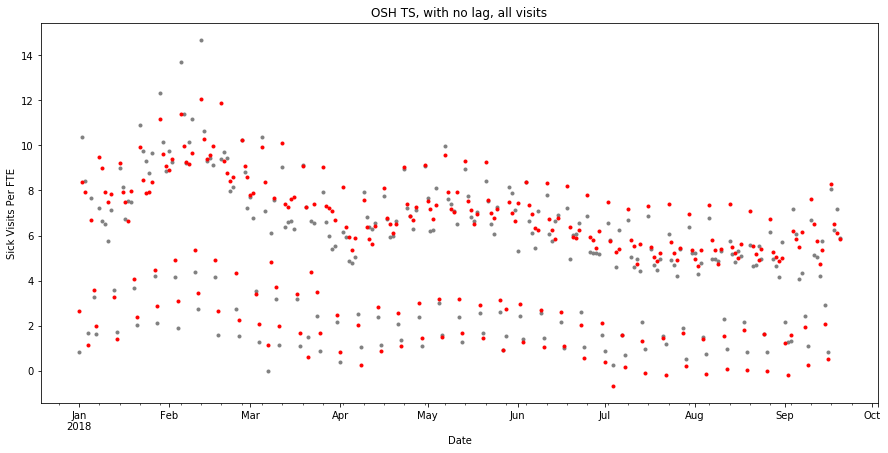

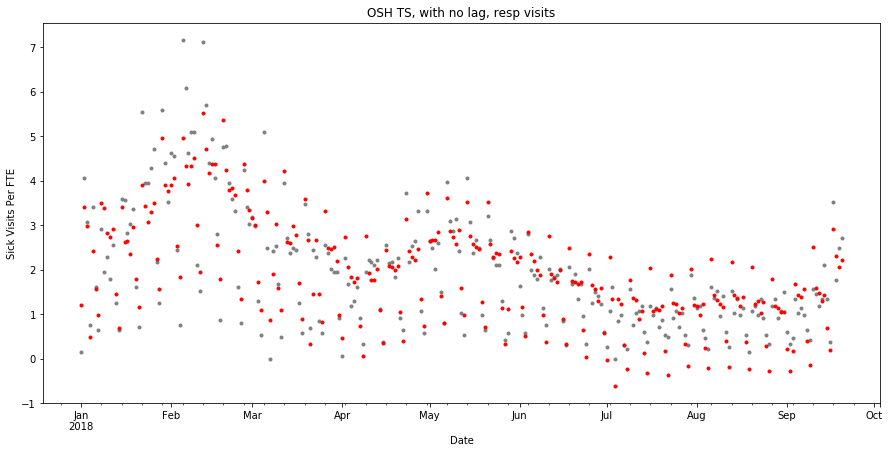

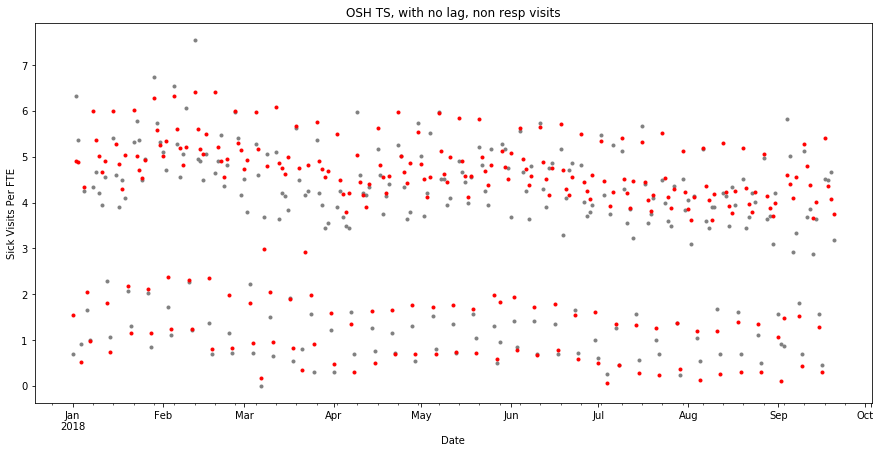

In [4]:
acutal_all, pred_all = run_OSH_TS("OSH TS, with no lag, all visits", BASE_FEATURES, ALL_VISITS_LABEL)
actual_r, pred_r = run_OSH_TS("OSH TS, with no lag, resp visits", BASE_FEATURES, ICD8_LABEL)
actual_nr, pred_nr = run_OSH_TS("OSH TS, with no lag, non resp visits", BASE_FEATURES, ICD8OPP_LABEL)

In [5]:
print(acutal_all)

[ 0.84291188 10.38314176  8.42911877  1.68582375  7.66283525  3.25670498
  1.64750958  7.24137931  6.62835249  6.51340996  5.74712644  7.12643678
  3.56321839  1.72413793  9.00383142  8.16091954  6.74329502  7.50957854
  7.47126437  3.67816092  2.03065134 10.88122605  9.73180077  9.31034483
  8.77394636  9.65517241  4.21455939  2.10727969 12.33716475 10.1532567
  8.85057471  9.73180077  9.27203065  4.17624521  1.87739464 13.7164751
 11.37931034  9.1954023  10.1532567  11.14942529  4.36781609  2.75862069
 14.6743295  10.651341    9.31034483  9.42528736  9.11877395  4.17624521
  1.57088123  9.38697318  9.69348659  9.42528736  7.96934866  8.16091954
  2.75862069  1.53256705 10.22988506  8.81226054  7.20306513  7.70114942
  6.78160919  3.52490421  1.26436782 10.38314176  7.0881226   6.09195402
  7.5862069   3.18007663  1.14942529  9.04214559  6.36015326  6.59003831
  6.62835249  6.2835249   3.18007663  1.11111111  9.11877395  7.27969349
  1.49425287  6.62835249  6.55172414  2.4137931   0.8

In [6]:
print(pred_all)

[ 2.66914153  8.38463083  7.94342703  1.14752014  6.69446706  3.60347978
  1.98018271  9.49643936  9.00006684  7.94815195  7.50502163  7.85876961
  3.27298551  1.4306441   9.20670009  7.94734601  7.47330028  6.65319228
  7.98153657  4.0531494   2.40246409  9.91817916  8.44360683  7.87986584
  7.93880287  8.3685694   4.4645852   2.89397227 11.18818033  9.63346919
  9.09803301  8.90551473  9.39061957  4.8990486   3.10026989 11.40282859
  9.97069712  9.25681297  9.17128662  9.64423487  5.37320004  3.44945592
 12.03778238 10.2919961   9.38505595  9.5521343   9.96889679  4.9238006
  2.64890439 11.87466119  9.28639337  8.77238479  8.41537863  8.60872371
  4.32037141  2.25602623 10.24094188  9.10618414  8.58473348  7.81688882
  7.89006202  3.40254344  2.08806256  9.90740742  8.3861346   4.81790287
  7.6693667   3.73280737  1.98194523 10.1124012   7.38522964  7.26679518
  7.61468625  7.70747455  3.40370976  1.68028702  9.09135332  7.27404027
  0.60808429  4.37456831  7.41686461  3.48893074  1.

In [7]:
print(actual_r)

[0.1532567  4.06130268 3.0651341  0.76628352 3.40996169 1.6091954
 0.651341   2.91187739 1.95402299 2.29885057 1.80076628 2.56704981
 1.26436782 0.651341   3.60153257 3.56321839 2.83524904 3.02681992
 3.37164751 1.6091954  0.72796935 5.55555556 3.94636015 3.94636015
 4.29118774 4.71264368 2.18390805 1.26436782 5.59386973 4.40613027
 3.52490421 4.63601533 4.55938697 2.45210728 0.76628352 7.16475096
 6.09195402 4.63601533 5.09578544 5.09578544 2.10727969 1.53256705
 7.12643678 5.70881226 4.40613027 4.94252874 4.06130268 2.79693487
 0.88122605 4.75095785 4.78927203 3.94636015 3.60153257 3.33333333
 1.6091954  0.8045977  4.25287356 3.40996169 3.02681992 3.18007663
 2.98850575 1.30268199 0.53639847 5.09578544 2.49042146 2.4137931
 2.52873563 1.68582375 0.49808429 3.94636015 2.72030651 2.37547893
 2.49042146 2.45210728 1.26436782 0.57471264 3.48659004 2.79693487
 0.68965517 2.45210728 2.29885057 0.84291188 0.57471264 2.56704981
 2.37547893 2.03065134 1.95402299 1.95402299 0.91954023 0.076628

In [8]:
print(pred_r)

[ 1.20543178  3.41514205  2.98788975  0.48979964  2.43507718  1.56556099
  0.98829947  3.49734446  3.39332437  2.83284681  2.74564043  2.92791417
  1.45318406  0.69135358  3.41130359  2.62827746  2.64884942  2.36519635
  2.95742831  1.79914171  1.16560289  3.91698266  3.43715335  3.08102975
  3.29899612  3.50113006  2.24521529  1.57995283  4.96566415  3.90989735
  3.77614908  3.91642177  4.06880669  2.53470666  1.83501421  4.95884688
  4.33767989  3.93704076  4.33609126  4.51337744  3.0092881   1.95637324
  5.53102357  4.72083475  4.18290224  4.3746738   4.37978586  2.55824641
  1.7963416   5.37156332  4.23568847  3.78610247  3.84605651  3.67243758
  2.41970577  1.35499543  4.38805765  3.79714491  3.34520912  3.173131
  3.0047997   1.72570685  1.1029944   3.99968326  3.30713144  1.90582141
  3.02423688  1.60359788  1.09706839  4.21404721  2.6301875   2.59353588
  2.99125137  2.78000517  1.69662727  0.90267592  3.5896705   2.67475806
  0.33450173  1.46190017  2.68048858  1.46635777  0.8

In [9]:
print(actual_nr)

[0.68965517 6.32183908 5.36398467 0.91954023 4.25287356 1.64750958
 0.99616858 4.32950192 4.6743295  4.21455939 3.94636015 4.55938697
 2.29885057 1.07279693 5.40229885 4.59770115 3.90804598 4.48275862
 4.09961686 2.06896552 1.30268199 5.3256705  5.78544061 5.36398467
 4.48275862 4.94252874 2.03065134 0.84291188 6.74329502 5.74712644
 5.3256705  5.09578544 4.71264368 1.72413793 1.11111111 6.55172414
 5.28735632 4.55938697 5.05747126 6.05363985 2.2605364  1.22605364
 7.54789272 4.94252874 4.90421456 4.48275862 5.05747126 1.37931034
 0.68965517 4.63601533 4.90421456 5.4789272  4.36781609 4.82758621
 1.14942529 0.72796935 5.97701149 5.40229885 4.17624521 4.5210728
 3.79310345 2.22222222 0.72796935 5.28735632 4.59770115 3.67816092
 5.05747126 1.49425287 0.651341   5.09578544 3.63984674 4.21455939
 4.13793103 3.83141762 1.91570881 0.53639847 5.63218391 4.48275862
 0.8045977  4.17624521 4.25287356 1.57088123 0.30651341 5.36398467
 4.21455939 3.94636015 3.44827586 3.56321839 1.22605364 0.30651

In [10]:
print(pred_nr)

[1.53894742 4.90342624 4.88302322 0.52463058 4.34353278 2.05007247
 0.97982486 5.99397811 5.37337529 5.02324395 4.6605057  4.90171263
 1.81692792 0.73200314 5.98812104 5.27498438 4.84348444 4.30685167
 5.04325244 2.17453244 1.16485168 6.02106432 5.01996935 4.715782
 4.53898945 4.93158464 2.111079   1.14718072 6.28666983 5.58056837
 5.26503783 5.01236953 5.34151786 2.36716635 1.24589856 6.33517484
 5.6031957  5.1907937  4.82801871 5.20781748 2.30303025 1.24205785
 6.4161154  5.59623581 5.17430146 5.05935516 5.49367618 2.36106132
 0.79925689 6.41369703 5.21077914 4.90949772 4.56734428 4.96067203
 1.9740631  0.8187602  5.99753043 5.29931719 5.15172271 4.7297772
 4.93599475 1.81352703 0.93204926 5.9830118  5.16241232 2.99354535
 4.80299546 2.05981747 0.96341819 6.07530813 4.85883253 4.75065877
 4.62886791 5.00378891 1.88583964 0.83238719 5.67891193 4.74368778
 0.33937098 2.91488703 4.82263853 1.97487483 0.91048587 5.7594259
 4.90821353 4.72762673 4.54837869 4.68925772 1.59422839 0.4767363


In [16]:
print([str(pd.to_datetime(str(i)))  for i in np.delete(np.array(data.loc[TEST_START:].index), 65)])

['2018-01-01 00:00:00', '2018-01-02 00:00:00', '2018-01-03 00:00:00', '2018-01-04 00:00:00', '2018-01-05 00:00:00', '2018-01-06 00:00:00', '2018-01-07 00:00:00', '2018-01-08 00:00:00', '2018-01-09 00:00:00', '2018-01-10 00:00:00', '2018-01-11 00:00:00', '2018-01-12 00:00:00', '2018-01-13 00:00:00', '2018-01-14 00:00:00', '2018-01-15 00:00:00', '2018-01-16 00:00:00', '2018-01-17 00:00:00', '2018-01-18 00:00:00', '2018-01-19 00:00:00', '2018-01-20 00:00:00', '2018-01-21 00:00:00', '2018-01-22 00:00:00', '2018-01-23 00:00:00', '2018-01-24 00:00:00', '2018-01-25 00:00:00', '2018-01-26 00:00:00', '2018-01-27 00:00:00', '2018-01-28 00:00:00', '2018-01-29 00:00:00', '2018-01-30 00:00:00', '2018-01-31 00:00:00', '2018-02-01 00:00:00', '2018-02-02 00:00:00', '2018-02-03 00:00:00', '2018-02-04 00:00:00', '2018-02-05 00:00:00', '2018-02-06 00:00:00', '2018-02-07 00:00:00', '2018-02-08 00:00:00', '2018-02-09 00:00:00', '2018-02-10 00:00:00', '2018-02-11 00:00:00', '2018-02-12 00:00:00', '2018-02-1